# El objetivo de este cuaderno es mostrar un resumen de los scripts


Vamos a comenzar visualizando la frecuencia l1 para ello importamos `funcionesdef.py`.
Además vamos a meter todos los archivos de `datos` en una lista. Archivos contiene un acceso a todos los datos disponibles

In [1]:
from funcionesdef import*
import numpy
import os 


carpeta_datos = 'datos'
archivos = [os.path.join(carpeta_datos, archivo) for archivo in os.listdir(carpeta_datos) if os.path.isfile(os.path.join(carpeta_datos,archivo))]
archivos.remove('datos/read.txt')
archivos

['datos/VIGO359A00.22O',
 'datos/BADJ122A00.22O',
 'datos/MAD1060A0030s.23O',
 'datos/MAD1047A00.23O',
 'datos/TERU042A00.23O',
 'datos/PENI168A00.22O',
 'datos/GRA1065Q00.23O',
 'datos/MAD1060R001s.23O']

Realizaremos un análisis gráfico de los datos relacionados con los satélites de un archivo específico con el objetivo de visualizar y comprender mejor la información. Este enfoque es ampliamente utilizado en la práctica para examinar y representar los datos satelitales de manera visual.
No voy a graficar todo por espacio. Si lo quiere simplemente ejecute esa celda.

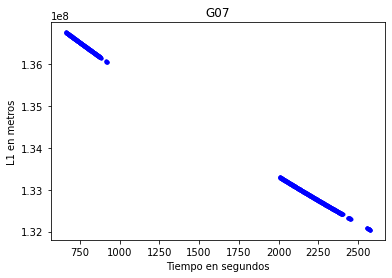

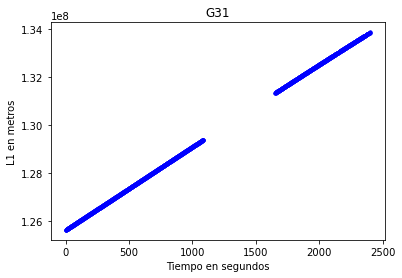

KeyboardInterrupt: 

In [7]:
Granada = archivos[6]
dict_Granada = all_information2(Granada)
graficar_frec(Granada,3)

Ahora vamos a utilizar estos datos para implementar los siguientes algoritmos para el satélite *G23*

## Métodos multifrecuencia

#### Combinación libre de geometría L1-L2

* Método1: 

* Método2:

Ambos métodos tienen tres variable:

1. datos, donde tenemos que insertar los datos sobre la frecuencia o combinación de frecuencias.
2. Numero de muestras a tomar por polinomio. 
3. Multiplo, que será las veces por las que multiplicaremos el umbral( múltiplo de la desviación típica de los residuos)

In [3]:
#Datos a utilizar
Granada = archivos[6]
sat = 'G23'
l1 = L1(Granada, sat)
l2 = L2(Granada, sat)

El umbral tiene relación con la desviación tipica por lo que la tercera variable de algoritmo será el múltiplo por el que multiplicaremos la desviación típica 

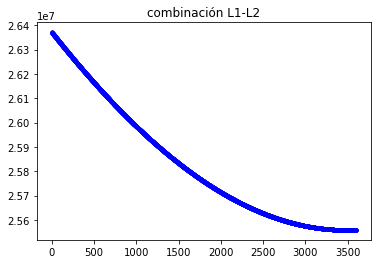

In [5]:
from combinacion_libre_geo import algoritmo as algoritmo_geo
N = 10
multiplo = 3
datos = f1menosf2(l1,l2)
saltos = algoritmo_geo(datos,N,3)
saltos_geo = [ i for i in saltos if i !=0]


Para `combinacion_libre_geo2` es análogo el proceso

### Combinación libre de ionosfera
Realizaremos un proceso análogo al anterior a difrencia de que los datos serán la combinación libre de ionosfera

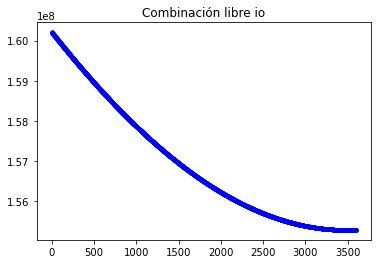

In [6]:
from combinacion_libre_io import algoritmo as algoritmo_io
N = 10
multiplo = 3
datos = combinacion_libre_ios(l1, l2)
saltos = algoritmo_io(datos,N,multiplo)
saltos_io = [ i for i in saltos if i !=0]

### Comparación de saltos de la combinación libre de geometría e ionosfera
Observación: el algoritmo que se encuentra en `combinacion_geo_iono.py` realiza un proceso análogo a esto que realizaré a continuación

In [13]:
print(f"Saltos de ciclo detectados con la combinación libre de geometría son: \n{saltos_geo}\n Saltos de ciclo detectados con la combinación libre de ionosfera son: \n{saltos_io}\n")
saltos_comunes = list(set(saltos_geo) & set(saltos_io))
saltos_nocomunes = list(set(saltos_geo) ^ set(saltos_io))
print(f"\nEl % de saltos de comunes {len(saltos_comunes)/(len(saltos_comunes)+len(saltos_nocomunes))}")
saltos_nocomunes


Saltos de ciclo detectados con la combinación libre de geometría son: 
[31, 34, 35, 36, 37, 38, 168, 171, 172, 173, 176, 177, 181, 183, 184, 185, 187, 188, 191, 192, 193, 195, 196, 198, 201, 203, 204, 205, 206, 207, 208, 231, 233, 254, 258, 267, 273, 275, 276, 285, 287, 288, 291, 293, 294, 295, 297, 298, 308, 311, 312, 313, 318, 341, 343, 344, 346, 358, 361, 368, 2008, 2009, 2441, 2443, 2444, 2446, 2447, 2565, 2574, 2578]
 Saltos de ciclo detectados con la combinación libre de ionosfera son: 
[31, 34, 35, 36, 37, 38, 168, 171, 172, 173, 176, 177, 181, 183, 184, 185, 187, 188, 191, 192, 193, 195, 196, 198, 201, 203, 204, 205, 206, 207, 208, 231, 233, 254, 258, 267, 273, 275, 276, 285, 287, 288, 291, 293, 294, 295, 297, 298, 308, 311, 312, 313, 318, 341, 343, 344, 346, 358, 361, 362, 368, 2008, 2009, 2441, 2443, 2444, 2446, 2447, 2565, 2574, 2578]


El % de saltos de comunes 0.9859154929577465


[362]

Ahora podríamos realizar un estudio sobre esos valores para ver que sucede con esos valores

## Métodos de simple frecuencia

### Algoritmo basado en clustering la idea es analizar los saltos de ciclo en función de los clústers

En este algoritmo incluimos las siguientes variables:
1. Datos 
2. Número de muestras a tomar 

Observación: el umbral lo elige el algoritmo en función del coeficiente de Silhouette

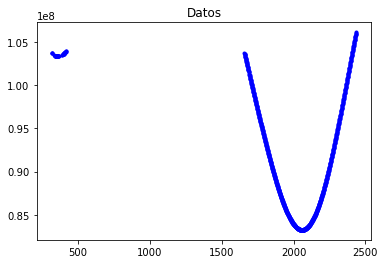

RANGO entre 0 35
SALTO DE CICLO
RANGO entre 35 70
SALTO DE CICLO
RANGO entre 70 105
SALTO DE CICLO
RANGO entre 105 140
{0, -1}
RANGO entre 140 175
{0, -1}
RANGO entre 175 210
{0, -1}
RANGO entre 210 245
{0, -1}
RANGO entre 245 280
{0, -1}
RANGO entre 280 315
{0, -1}
RANGO entre 315 350
{0, -1}
RANGO entre 350 385
{0, -1}
RANGO entre 385 420
{0, -1}
RANGO entre 420 455
{0, -1}
RANGO entre 455 490
{0, -1}
RANGO entre 490 525
{0, -1}
RANGO entre 525 560
{0, -1}
RANGO entre 560 595
{0, -1}
RANGO entre 595 630
{0, -1}
RANGO entre 630 665
{0, -1}
RANGO entre 665 700
{0, -1}
RANGO entre 700 735
{0, -1}
RANGO entre 735 770
{0}
RANGO entre 770 805
{0, -1}
RANGO entre 805 840
{0, -1}


In [11]:
from clustering import algoritmo as algoritmo_clustering
Madrid = archivos[2]
sat = 'G16'
N = 35
datos = L2(Madrid,sat)
algoritmo_clustering(datos,N)

### Algoritmo basado en regresión lineal

Este método tiene 3 variables:

1. datos, donde tenemos que insertar los datos sobre la frecuencia o combinación de frecuencias.
2. Numero de muestras a tomar por el algoritmo. 
3. El umbral es la media + 2 veces la desviación típica[Cambiar por r²]


In [1]:
from regresion2 import algoritmo
Madrid = archivos[5]
dict_Madrid = all_information2(Madrid)
sat = 'G16' #Obtenido graficando y analizando
datos = L2(Madrid,sat)
graficar_sat(Madrid,4,sat)
paso = 9
algoritmo(datos,paso)

NameError: name 'archivos' is not defined

Ahora vamos a verificar esos saltos con un contraste de hipótesis

In [25]:
from contraste2 import comprobacion
comprobacion(datos,paso)

[False, False, True, False, False, True, True]

### Algoritmo basado en MAD y desviación típica